# Proyek Analisis Data: Bike Sharing

<img src="https://upload.wikimedia.org/wikipedia/commons/8/87/00_2141_Bicycle-sharing_systems_-_Sweden.jpg" alt="Bike Sharing" style="width:400px;">

- Nama        : Rafi Haffiyan
- Email       : haffiyanrafi@gmail.com
- ID Dicoding : rafihaffiyan

## Menentukan Pertanyaan Bisnis

- Bagaimana jumlah sewa sepeda setiap jamnya?
- Bagaimana perbedaan jumlah sewa sepeda pada weekday dan weekend?
- Bagaimana faktor cuaca mempengaruhi jumlah sewa sepeda?
- Apakah ada hubungan antara musim terhadap jumlah pengguna sepeda?
- Bagaimana kontribusi pengguna sepeda casual dengan registered?

## Menyiapkan Library yang Dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai data day_df

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai data hour_df

In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Cek value data yang kosong

In [8]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Mengubah Tipe Data pada day_df

In [10]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
print(day_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [11]:
cols = ['season' , 'holiday' , 'weekday' , 'workingday' , 'weathersit']
for col in cols :
    day_df[col] = day_df[col].astype('category')

#### Menghapus kolom yang tidak diperlukan

In [12]:
kolom = ['instant', 'yr', 'mnth', 'temp', 'atemp', 'hum', 'windspeed']
day_df.drop(kolom, axis=1, inplace=True)
print(day_df)

        dteday season holiday weekday workingday weathersit  casual  \
0   2011-01-01      1       0       6          0          2     331   
1   2011-01-02      1       0       0          0          2     131   
2   2011-01-03      1       0       1          1          1     120   
3   2011-01-04      1       0       2          1          1     108   
4   2011-01-05      1       0       3          1          1      82   
..         ...    ...     ...     ...        ...        ...     ...   
726 2012-12-27      1       0       4          1          2     247   
727 2012-12-28      1       0       5          1          2     644   
728 2012-12-29      1       0       6          0          2     159   
729 2012-12-30      1       0       0          0          1     364   
730 2012-12-31      1       0       1          1          2     439   

     registered   cnt  
0           654   985  
1           670   801  
2          1229  1349  
3          1454  1562  
4          1518  1600  
.. 

#### Mengubah nama kolom

In [13]:
new = {'dteday': 'date',
        'cnt': 'count',
      'weathersit' : 'weather'}
day_df.rename(columns=new, inplace=True)
print(day_df)

          date season holiday weekday workingday weather  casual  registered  \
0   2011-01-01      1       0       6          0       2     331         654   
1   2011-01-02      1       0       0          0       2     131         670   
2   2011-01-03      1       0       1          1       1     120        1229   
3   2011-01-04      1       0       2          1       1     108        1454   
4   2011-01-05      1       0       3          1       1      82        1518   
..         ...    ...     ...     ...        ...     ...     ...         ...   
726 2012-12-27      1       0       4          1       2     247        1867   
727 2012-12-28      1       0       5          1       2     644        2451   
728 2012-12-29      1       0       6          0       2     159        1182   
729 2012-12-30      1       0       0          0       1     364        1432   
730 2012-12-31      1       0       1          1       2     439        2290   

     count  
0      985  
1      801  


#### Mengubah Tipe Data pada hour_df

In [14]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
print(hour_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


#### Menghapus kolom yang tidak diperlukan

In [15]:
kolom = ['instant', 'yr', 'mnth', 'temp', 'atemp', 'hum', 'windspeed']
hour_df.drop(kolom, axis=1, inplace=True)
print(hour_df)

          dteday  season  hr  holiday  weekday  workingday  weathersit  \
0     2011-01-01       1   0        0        6           0           1   
1     2011-01-01       1   1        0        6           0           1   
2     2011-01-01       1   2        0        6           0           1   
3     2011-01-01       1   3        0        6           0           1   
4     2011-01-01       1   4        0        6           0           1   
...          ...     ...  ..      ...      ...         ...         ...   
17374 2012-12-31       1  19        0        1           1           2   
17375 2012-12-31       1  20        0        1           1           2   
17376 2012-12-31       1  21        0        1           1           1   
17377 2012-12-31       1  22        0        1           1           1   
17378 2012-12-31       1  23        0        1           1           1   

       casual  registered  cnt  
0           3          13   16  
1           8          32   40  
2           

#### Mengubah nama kolom

In [16]:
new = {'dteday': 'date',
        'cnt': 'count',
      'weathersit' : 'weather',
      'hr': 'hour'}
hour_df.rename(columns=new, inplace=True)
print(hour_df)

            date  season  hour  holiday  weekday  workingday  weather  casual  \
0     2011-01-01       1     0        0        6           0        1       3   
1     2011-01-01       1     1        0        6           0        1       8   
2     2011-01-01       1     2        0        6           0        1       5   
3     2011-01-01       1     3        0        6           0        1       3   
4     2011-01-01       1     4        0        6           0        1       0   
...          ...     ...   ...      ...      ...         ...      ...     ...   
17374 2012-12-31       1    19        0        1           1        2      11   
17375 2012-12-31       1    20        0        1           1        2       8   
17376 2012-12-31       1    21        0        1           1        1       7   
17377 2012-12-31       1    22        0        1           1        1      13   
17378 2012-12-31       1    23        0        1           1        1      12   

       registered  count  


## Exploratory Data Analysis

### Menampilkan jumlah pengguna sepeda setiap jamnya

In [17]:
hourly_count = hour_df.groupby('hour')['count'].sum().reset_index()
hourly_count

,hour,count
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


### Menampilkan jumlah pengguna sepeda setiap bulannya

In [18]:
monthly_counts = day_df.groupby(day_df['date'].dt.strftime('%Y-%m'))['count'].sum()

monthly_counts

date
2011-01     38189
2011-02     48215
2011-03     64045
2011-04     94870
2011-05    135821
2011-06    143512
2011-07    141341
2011-08    136691
2011-09    127418
2011-10    123511
2011-11    102167
2011-12     87323
2012-01     96744
2012-02    103137
2012-03    164875
2012-04    174224
2012-05    195865
2012-06    202830
2012-07    203607
2012-08    214503
2012-09    218573
2012-10    198841
2012-11    152664
2012-12    123713
Name: count, dtype: int64

### Perbandingan jumlah pengguna sepeda pada weekday dan weekend

In [19]:
counts = day_df.groupby('workingday')['count'].sum()

comparison_table = pd.DataFrame({'Total Sewa Sepeda': counts.values},
                                index=['Weekend', 'Weekday'])

comparison_table

,Total Sewa Sepeda
Weekend,1000269
Weekday,2292410


### Jumlah Pengguna Sepeda pada Cuaca tertentu

In [20]:
counts = day_df.groupby('weather')['count'].sum()
weather_counts = pd.DataFrame({'Cuaca': counts.index, 'Jumlah Sewa Sepeda': counts.values})

weather_counts

,Cuaca,Jumlah Sewa Sepeda
0,1,2257952
1,2,996858
2,3,37869


### Jumlah Pengguna Sepeda pada Musim Tertentu

In [21]:
counts = day_df.groupby('season')['count'].sum()
season_counts = pd.DataFrame({'Musim': counts.index, 'Jumlah Sewa Sepeda': counts.values})

season_counts

,Musim,Jumlah Sewa Sepeda
0,1,471348
1,2,918589
2,3,1061129
3,4,841613


### Jumlah Pengguna Sepeda casual dan registered

In [22]:
casual_count = day_df['casual'].sum()
registered_count = day_df['registered'].sum()

print("Jumlah Pengguna Sepeda Casual: ", casual_count)
print("Jumlah Pengguna Sepeda Registered: ", registered_count)

Jumlah Pengguna Sepeda Casual:  620017
Jumlah Pengguna Sepeda Registered:  2672662


## Visualization & Explanatory Analysis

### Bagaimana jumlah sewa sepeda setiap jamnya?

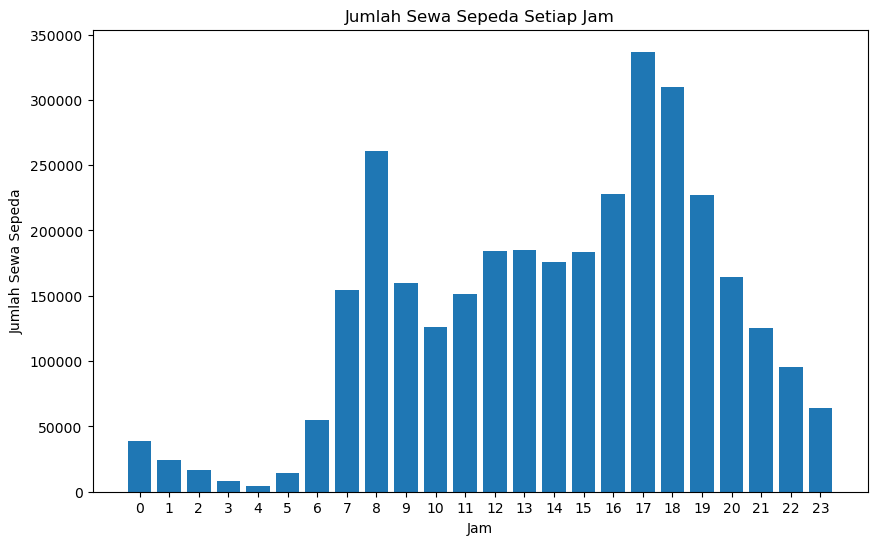

In [23]:
hourly_count = hour_df.groupby('hour')['count'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(hourly_count['hour'], hourly_count['count'])
plt.title('Jumlah Sewa Sepeda Setiap Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Sewa Sepeda')
plt.xticks(hourly_count['hour'])
plt.show()

### Bagaimana perbedaan jumlah sewa sepeda pada weekday dan weekend?

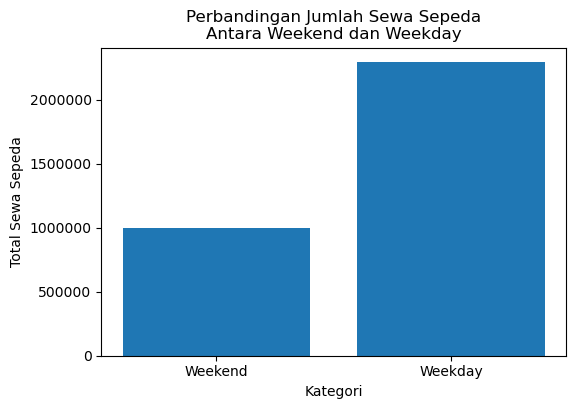

In [24]:
counts = day_df.groupby('workingday')['count'].sum()

comparison_table = pd.DataFrame({'Total Sewa Sepeda': counts.values},
                                index=['Weekend', 'Weekday'])

plt.figure(figsize=(6, 4))
plt.bar(comparison_table.index, comparison_table['Total Sewa Sepeda'])
plt.title('Perbandingan Jumlah Sewa Sepeda\nAntara Weekend dan Weekday')
plt.xlabel('Kategori')
plt.ylabel('Total Sewa Sepeda')
plt.ticklabel_format(style='plain', axis='y')

plt.show()


### Bagaimana faktor cuaca mempengaruhi jumlah sewa sepeda?

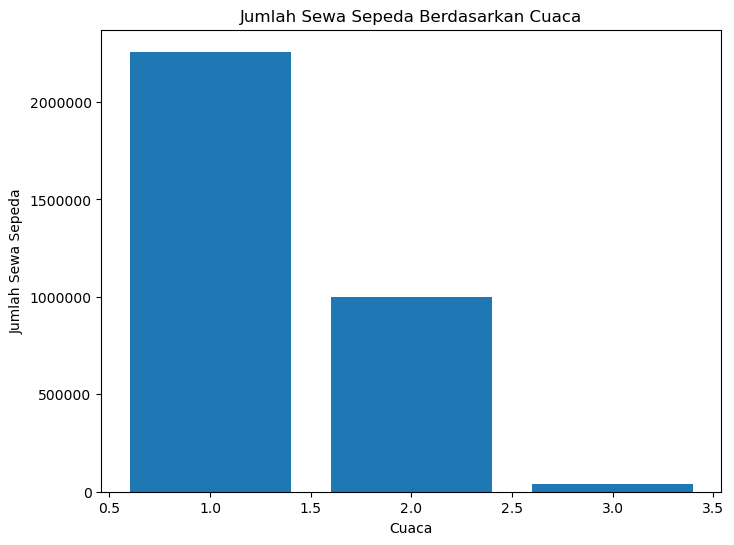

In [25]:
counts = day_df.groupby('weather')['count'].sum()
weather_counts = pd.DataFrame({'Cuaca': counts.index, 'Jumlah Sewa Sepeda': counts.values})

plt.figure(figsize=(8, 6))
plt.bar(weather_counts['Cuaca'], weather_counts['Jumlah Sewa Sepeda'])
plt.title('Jumlah Sewa Sepeda Berdasarkan Cuaca')
plt.xlabel('Cuaca')
plt.ylabel('Jumlah Sewa Sepeda')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

### Apakah ada hubungan antara musim terhadap jumlah pengguna sepeda?

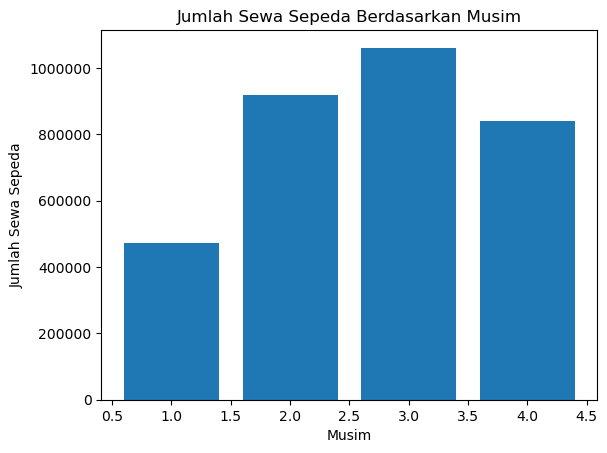

In [26]:
counts = day_df.groupby('season')['count'].sum()
season_counts = pd.DataFrame({'Musim': counts.index, 'Jumlah Sewa Sepeda': counts.values})

plt.bar(season_counts['Musim'], season_counts['Jumlah Sewa Sepeda'])
plt.xlabel('Musim')
plt.ylabel('Jumlah Sewa Sepeda')
plt.title('Jumlah Sewa Sepeda Berdasarkan Musim')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Bagaimana jumlah pengguna sepeda casual dengan registered?

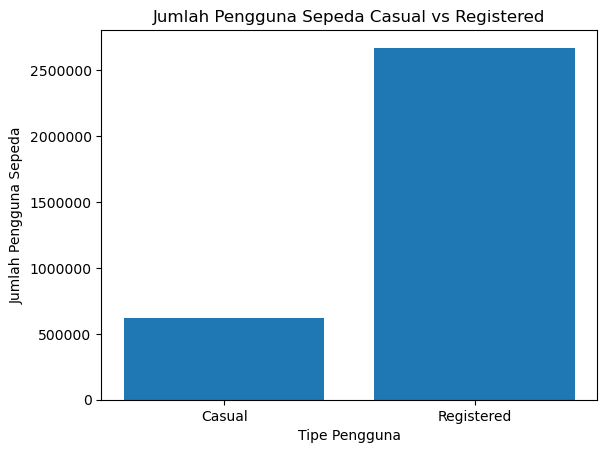

In [27]:
casual_count = day_df['casual'].sum()
registered_count = day_df['registered'].sum()

labels = ['Casual', 'Registered']
counts = [casual_count, registered_count]

plt.bar(labels, counts)
plt.xlabel('Tipe Pengguna')
plt.ylabel('Jumlah Pengguna Sepeda')
plt.title('Jumlah Pengguna Sepeda Casual vs Registered')
plt.ticklabel_format(style='plain', axis='y')

plt.show()

## Conclusion

- Berdasarkan analisis data, dapat dilihat bahwa jumlah sewa sepeda memiliki pola yang bervariasi sepanjang hari. Puncak sewa terjadi pada jam-jam sibuk, seperti pagi hari pukul 8 dan sore hari sekitar pukul 17-18.
- Terdapat perbedaan yang signifikan antara jumlah sewa sepeda pada weekday (hari kerja) dan weekend (akhir pekan). Jumlah sewa sepeda cenderung lebih tinggi pada weekday daripada weekend, menunjukkan bahwa sepeda banyak digunakan untuk kegiatan sehari-hari.
- Cuaca memainkan peran penting dalam jumlah sewa sepeda. Pada kategori cuaca 1, jumlah sewa sepeda cenderung lebih tinggi daripada kategori cuaca 2 dan 3.
- Terdapat hubungan yang jelas antara musim dengan jumlah pengguna sepeda. Pada kategori musim 2 dan musim 3, jumlah sewa sepeda cenderung lebih tinggi dibandingkan dengan musim 1 dan 4.
- Jumlah pengguna sepeda casual (non-anggota) dan registered (anggota) memiliki kontribusi yang signifikan terhadap total jumlah sewa sepeda. Pengguna sepeda registered cenderung memberikan kontribusi lebih besar dibandingkan dengan pengguna sepeda casual, menunjukkan bahwa anggota memiliki tingkat penggunaan sepeda yang lebih konsisten.

In [28]:
day_df.to_csv('day_bikesharing.csv')
hour_df.to_csv('hour_bikesharing.csv')